In [1]:
### Import libraries

%load_ext autoreload
%autoreload 2
%matplotlib inline  

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "Arial"

import sys
import os
from __future__ import division
import numpy as np
import inspect
import pyparsing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pycog import Model, tasktools, RNN
from pycog.trialRNN import Trial

# Time
import datetime

# clear output
from IPython.display import clear_output
clear_output()

In [2]:
### ANALYSIS SAVE PATH

time = datetime.datetime.now()
datestr = time.isoformat()[0:10]

basePath = os.path.abspath('../')
if not sys.path.__contains__(basePath):
    sys.path.append(basePath)
basePath = basePath + '/'
dirPath = datestr + '_cb_3areas/' # all outputs and analyses will be saved here.
savePath = basePath + dirPath
savePathB = savePath + 'behavior/'
savePathN = savePath + 'neural/'
savePathP = savePath + 'psth/'
savePathC = savePath + 'cp/'
savePathD = savePath + 'dynamics/'

if not os.path.exists(savePath):
    os.makedirs(savePath)
    
if not os.path.exists(savePathB):
    os.makedirs(savePathB)
    
if not os.path.exists(savePathN):
    os.makedirs(savePathN)
    
if not os.path.exists(savePathP):
    os.makedirs(savePathP)    

if not os.path.exists(savePathC):
    os.makedirs(savePathC)    

if not os.path.exists(savePathD):
    os.makedirs(savePathD)   
    
### LOAD RNN PATH
# rnnPath = basePath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas_fb=0p0/'
# rnnName = '2020-04-10_cb_simple_3areas_fb=0p0_seed=7.pkl'

rnnPath = basePath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas/'
rnnName = '2020-04-10_cb_simple_3areas_seed=7.pkl'
rnnPath = rnnPath + rnnName

### ANALYSIS SCRIPT PATH -- this is for the script file so we can generate new trials to cross-validate, etc.
modelPath = basePath + 'examples/models/'
modelName = 'cb_analyze_fixed-cb.py' 
modelPath = modelPath + modelName

In [3]:
basePath

'/Users/michael/Documents/GitHub/multi-area-cleaned/'

In [4]:
from pycog.trialRNN import Dynamics 

# Define area partitions, which units are in area 1, 2, and 3.
idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80, 160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160, 240), np.arange(280, 300)))
partition_pca = [idx1, idx2, idx3]

# Set noise levels
vin = 0.1 ** 2 #0.10**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05 **2

# Run RNN trials
dyn = Dynamics(rnnPath, modelPath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=10, seed=1, threshold=0.6, align='cb', partition_pca=partition_pca, onlyCorrect=True)

[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 280/280: left_right: -1, cond: 11
The proportion of NaN RTs is 0.0


/Users/michael/Documents/GitHub/multi-area-cleaned/pycog/trialRNN.py:1160: RuntimeWarning: Mean of empty slice
  psth = np.nanmean(p_mtx, axis=0)


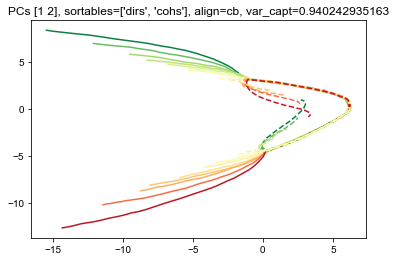

In [910]:
# Fig 7a - plot of PCs

# dyn.plot_pcs_area(window=np.arange(185), is_x=True, partition_idx=0)
dyn.plot_pcs_area(window=np.arange(185), is_x=True, partition_idx=0)

plt.savefig(savePathD + 'PCs.pdf')

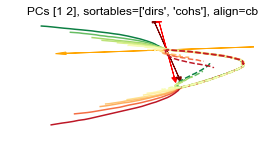

In [963]:
# Fig 7b - plot of PCs with dPCA axes

# load axes
dyn.dims = np.array((0,1))

dir_axis = np.load(basePath + 'sims/revision/exemplar_new/scratch_data/axes/' + 'ex_dir_axis_J.npy')
dir_axis = dir_axis.reshape(-1)
col_axis = np.load(basePath + 'sims/revision/exemplar_new/scratch_data/axes/' + 'ex_col_axis_J.npy')
col_axis = col_axis.reshape(-1)
ctx_axis = np.load(basePath + 'sims/revision/exemplar_new/scratch_data/axes/' + 'ex_ctx_axis_J.npy')
ctx_axis = ctx_axis.reshape(-1)

f = plt.figure(figsize=(4,2))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
ax = f.gca()
ax.axis('off')
f.savefig(savePathD + 'PCs+dPCs.pdf')

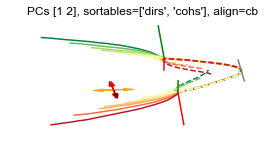

In [964]:
# Fig 7c - plot of PCs with inputs on

f = plt.figure(figsize=(4,2))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=4, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=4, start_loc='baseline')
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=4, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=4, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=4, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=4, start_loc='targets2', arrow_color='r')
ax = f.gca()
ax.axis('off')
f.savefig(savePathD + 'PCs+inputs.pdf')

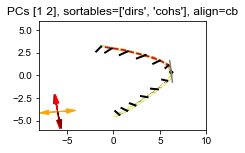

In [965]:
# Fig 7d - plot of targ onset with dynamics

f = plt.figure(figsize=(3,2))

x_sample = 1
y_sample = 1
xmin = 0
xmax = 0
ymin = 0
ymax = 0
scale = 1

dyn.partition_deltas(x_sample=x_sample, y_sample=y_sample, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(150), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(60,150,10, dtype='int'),
                                                    conds = [0,8], scale=scale * dyn.rnn.p['tau'])
# inputs scaled up to be visible
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=2*scale, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=2*scale, start_loc='baseline')
#                                                 xlim=[0,5], ylim=[0,5])
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='red')

ax = f.gca()
ax.set_xlim([-8, 10])
ax.set_ylim([-6,6])
plt.savefig(savePathD + 'PCs+targ-on-dynamics.pdf')


start loc is targets1


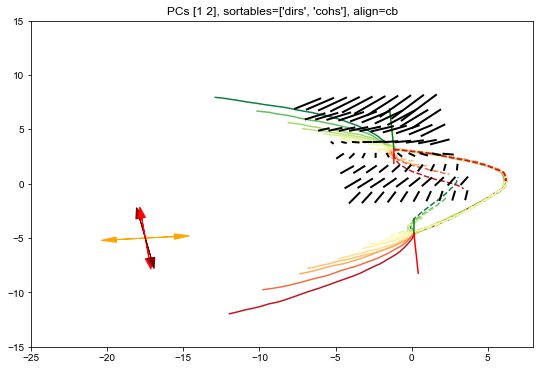

In [966]:
# Fig 7e - plot of local check on dynamics

scale = 1

#f = plt.figure(figsize=(3,2))

f = plt.figure(figsize=(9,6))

dyn.partition_deltas(x_sample=10, y_sample=8, xmin=-10, xmax=10, ymin=-5, ymax=5)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=151, scale=scale*dyn.rnn.p['tau'])

ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

plt.savefig(savePathD + 'PCs+check-on-dynamics-local.pdf')

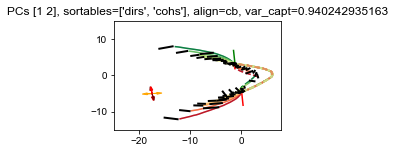

In [967]:
# Fig 7f - plot of check on dynamics along trajectories.
# Note, arrows were subsampled after generating this figure for visual clarity.

scale = 1

f = plt.figure(figsize=(3,2))

inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
dyn.partition_deltas(x_sample=1, y_sample=1, xmin=0, xmax=0, ymin=0, ymax=0)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs_area(f = f, window=np.arange(180), is_x=True, alpha=0.25)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(7,13,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
    
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(14,20,3, dtype='int'), scale=scale*dyn.rnn.p['tau'])
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
inputs = np.array((1,-1,0,0))
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(0,7,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])

f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(21,27,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])
ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

plt.savefig(savePathD + 'PCs+check-on-dynamics.pdf')

## perturbation experiment

What's the best way to define an input in this case?

In [116]:
modelPath = basePath + 'examples/models/'
modelName = 'cb_analyze_fixed-cb-perturb.py'
modelPath = modelPath + modelName

from pycog.trialRNN import Dynamics 

# Define area partitions, which units are in area 1, 2, and 3.
idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80, 160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160, 240), np.arange(280, 300)))
partition_pca = [idx1, idx2, idx3]

# Set noise levels
vin = 0 #0.10**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.0 **2

# Run RNN trials
dyn = Dynamics(rnnPath, modelPath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=10, seed=1, threshold=0.6, align='cb', partition_pca=partition_pca)

[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 20/20: left_right: -1, cond: 11
The proportion of NaN RTs is 1.0


In [1]:
PCs = dyn.partition_pca[0]['PCs']
means = dyn.partition_pca[0]['means']

pulse = 81
window=np.arange(130)
for i in range(20):
    pc_scores  = np.dot(PCs[:, :2].T, (dyn.trials[i]['r'][dyn.partitions[0]].T - means).T)
    plt.plot(pc_scores[0, window], pc_scores[1, window])
    plt.plot(pc_scores[0, pulse], pc_scores[1, pulse], color=(0.4,0.7,1), marker='.', markersize=20)
    
plt.xlabel('PC1')
plt.ylabel('PC2')

NameError: name 'dyn' is not defined

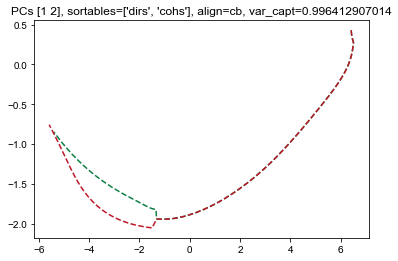

In [118]:
# Fig 7a - plot of PCs

# dyn.plot_pcs_area(window=np.arange(185), is_x=True, partition_idx=0)
# f = dyn.plot_pcs_trials(axis=dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
dyn.plot_pcs_area(window=np.arange(200), is_x=True, partition_idx=0)

plt.savefig(savePathD + 'PCs.pdf')

## fixed point analyses

In [176]:
# Define networks
import torch
import torch.nn as nn
from torch.nn import init
from torch.nn import functional as F
import math
    

class CTRNN(nn.Module):
    """Continuous-time RNN.

    Args:
        input_size: Number of input neurons
        hidden_size: Number of hidden neurons

    Inputs:
        input: (seq_len, batch, input_size), network input
        hidden: (batch, hidden_size), initial hidden activity
    """

    def __init__(self, input_size, hidden_size, dt=None, **kwargs):
        super(CTRNN,self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.tau = 50
        if dt is None:
            alpha = 1
        else:
            alpha = dt / self.tau
        self.alpha = alpha
        self.oneminusalpha = 1 - alpha

        self.input2h = nn.Linear(input_size, hidden_size, bias=False)
        self.h2h = nn.Linear(hidden_size, hidden_size, bias=False)
        self.brec = torch.zeros(hidden_size, )

    def init_hidden(self, input_shape):
        batch_size = input_shape[1]
        return torch.zeros(batch_size, self.hidden_size)

#     def recurrence(self, input, hidden):
#         """Recurrence helper."""
#         pre_activation = self.input2h(input) + self.h2h(hidden) + self.brec
#         h_new = torch.relu(hidden * self.oneminusalpha +
#                            pre_activation * self.alpha)
#         return h_new
    def recurrence(self, input, hidden):
        """Recurrence helper."""
        pre_activation = self.input2h(input) + torch.relu(self.h2h(hidden)) + self.brec
        h_new = hidden * self.oneminusalpha + pre_activation * self.alpha
        return h_new
    
    def forward(self, input, hidden=None):
        """Propogate input through the network."""
        if hidden is None:
            hidden = self.init_hidden(input.shape).to(input.device)

        output = []
        steps = range(input.size(0))
        for i in steps:
            hidden = self.recurrence(input[i], hidden)
            output.append(hidden)

        output = torch.stack(output, dim=0)
        return output, hidden


class RNNNet(nn.Module):
    """Recurrent network model.

    Args:
        input_size: int, input size
        hidden_size: int, hidden size
        output_size: int, output size
        rnn: str, type of RNN, lstm, rnn, ctrnn, or eirnn
    """
    def __init__(self, input_size, hidden_size, output_size, **kwargs):
        super(RNNNet, self).__init__()

        # Continuous time RNN
        self.rnn = CTRNN(input_size, hidden_size, **kwargs)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        rnn_activity, _ = self.rnn(x)
        out = self.fc(rnn_activity)
        return out, rnn_activity

In [214]:
# Instantiate the network and print information
hidden_size = 300 #300

# hidden_size = 300 #100
input_size = 4
output_size = 2
net = RNNNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size, dt=10)
print(net)

Wrec = dyn.rnn.Wrec
Wout = dyn.rnn.Wout
Win = dyn.rnn.Win
bout = dyn.rnn.bout
brec = dyn.rnn.brec

# hidden
# Wrec = Wrec[idx1, :][:, idx1]
# Wout = dyn.rnn.Wout
# Win = dyn.rnn.Win[idx1, :]
# bout = dyn.rnn.bout
# brec = dyn.rnn.brec[idx1]


net.bias = brec
net.rnn.h2h.weight.data = torch.tensor(Wrec)
net.rnn.input2h.weight.data = torch.tensor(Win)
net.fc.weight.data = torch.tensor(Wout)
net.fc.bias.weight = bout

def sample_inititializations(ctx = -1):
    idx_ctxA = [trial for trial in range(100) if dyn.trials[trial]['info']['left_right'] == ctx]
    hiddens_init = []
    for idx_a in idx_ctxA:
        hidden_init = dyn.trials[trial]['x'][:, 80:140].T
        hiddens_init.append(hidden_init)
    return np.array(hiddens_init).reshape(-1,300)


RNNNet(
  (rnn): CTRNN(
    (input2h): Linear(in_features=4, out_features=300, bias=False)
    (h2h): Linear(in_features=300, out_features=300, bias=False)
  )
  (fc): Linear(in_features=300, out_features=2, bias=True)
)


In [353]:
import torch.optim as optim
import pdb

# Freeze for parameters in the recurrent network
for param in net.parameters():
    param.requires_grad = False

batch_size = 128
left_right = 1

# Inputs should be the 0-coherence mean input during stimulus period
# This will be task-specific
if left_right == -1:
    input = np.tile([-1, 1, 0, 0], (batch_size, 1))
else:
    input = np.tile([1, -1, 0, 0], (batch_size, 1))
input = torch.tensor(input, dtype=torch.float32)

# Here hidden activity is the variable to be optimized
hidden_init = sample_inititializations(ctx = left_right)
samples_ids = list(np.random.randint(hidden_init.shape[0], size=batch_size))
hidden_init = hidden_init[samples_ids, :] + np.random.randn(batch_size, hidden_size) * 0.5
hidden = torch.tensor(hidden_init, requires_grad=True, dtype=torch.float32) 

# Use Adam optimizer
optimizer = optim.Adam([hidden], lr=0.001)
criterion = nn.MSELoss()

running_loss = 0
for i in range(20000):
    optimizer.zero_grad()   # zero the gradient buffers
    
    # Take the one-step recurrent function from the trained network
    new_h = net.rnn.recurrence(input, hidden)
    loss = criterion(new_h, hidden)

    loss.backward()
    optimizer.step()    # Does the update

    running_loss += loss.item()
    if i % 1000 == 999:
        running_loss /= 1000
        print('Step {}, Loss {:0.4f}'.format(i+1, running_loss ))
        running_loss = 0

Step 1000, Loss 0.0233
Step 2000, Loss 0.0094
Step 3000, Loss 0.0050
Step 4000, Loss 0.0028
Step 5000, Loss 0.0015
Step 6000, Loss 0.0008
Step 7000, Loss 0.0004
Step 8000, Loss 0.0002
Step 9000, Loss 0.0001
Step 10000, Loss 0.0000
Step 11000, Loss 0.0000
Step 12000, Loss 0.0000
Step 13000, Loss 0.0000
Step 14000, Loss 0.0000
Step 15000, Loss 0.0000
Step 16000, Loss 0.0000
Step 17000, Loss 0.0000
Step 18000, Loss 0.0000
Step 19000, Loss 0.0000
Step 20000, Loss 0.0000


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


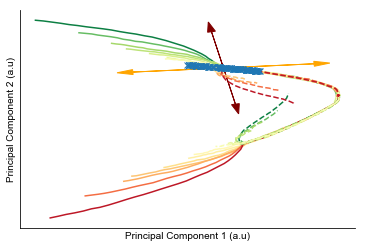

In [365]:
new_h = net.rnn.recurrence(input, hidden)
def myloss(new_h, hidden):
    return torch.sum((new_h - hidden) ** 2, axis=1)

area = 0 #0 1 2
idx_area = idx1
# idx_area = np.arange(100)

testloss = myloss(new_h, hidden)
testloss_np = testloss.detach().numpy()
idx_testloss = [idx for idx,l in enumerate(testloss_np) if l < 1e-2]
print(idx_testloss)

fixedpoints = hidden.detach().numpy()
fixedpoints = fixedpoints[idx_testloss]

f = dyn.plot_pcs_area(window=np.arange(0,180), is_x=True, partition_idx=area)

scale = 1
# f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
# f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=6, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=4, arrow_color='maroon')
# f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=4, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='targets1', f=f, scale=6, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='targets1', f=f, scale=4, arrow_color='maroon')
# f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='targets1', f=f, scale=4, arrow_color='red')

PCs = dyn.partition_pca[area]['x_PCs']
means = dyn.partition_pca[area]['x_means']


dims = dyn.dims
scores = np.dot(PCs[:, dims].T, (fixedpoints[:, idx_area] - means).T)


plt.plot(scores[0, :], scores[1, :], 'x')

# plt.axis('off')

# Beautification
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Principal Component 1 (a.u)')
plt.ylabel('Principal Component 2 (a.u)')
plt.xticks([])
plt.yticks([])

plt.title('')
if left_right == -1:
    save_string = 'PCs_area1_bot.pdf'
elif left_right == 1:
    save_string = 'PCs_area1_top.pdf'

plt.savefig(savePathD + save_string, format='pdf', dpi=None, bbox_inches='tight')



## Test

In [925]:
dims

array([0, 1])

In [655]:
means.shape

(100,)

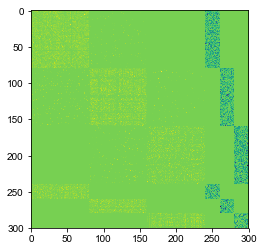

In [822]:
plt.imshow(Wrec)

## Old work

In [ ]:
import torch.optim as optim
import pdb

# Freeze for parameters in the recurrent network
for param in net.parameters():
    param.requires_grad = False

batch_size = 128

# Inputs should be the 0-coherence mean input during stimulus period
# This will be task-specific
# trial = 2 #5 #2 or 1 #20 #5
# left_right = dyn.trials[trial]['info']['left_right']
# print(left_right)
left_right = -1

if left_right == -1:
    input = np.tile([-1, 1, 0, 0], (batch_size, 1))
else:
    input = np.tile([1, -1, 0, 0], (batch_size, 1))
input = torch.tensor(input, dtype=torch.float32)

# Here hidden activity is the variable to be optimized
# Initialized randomly for search in parallel (activity all positive)
# hidden = torch.tensor(np.random.rand(batch_size, hidden_size) * 10,
#                       requires_grad=True, dtype=torch.float32)

# hidden_init = dyn.trials[trial]['r'][:, 80]
# hidden_init = dyn.trials[trial]['x'][:, 120]

# hidden_init = dyn.trials[trial]['x'][:, 60:60+batch_size].T
# hidden_init = hidden_init + np.random.randn(batch_size, hidden_size) * 2

# hidden_init = np.random.randn(batch_size, hidden_size) * 5

hidden_init = sample_inititializations(ctx = left_right)
samples_ids = list(np.random.randint(hidden_init.shape[0], size=batch_size))
hidden_init = hidden_init[samples_ids, :] + np.random.randn(batch_size, hidden_size) * 0.5

# hidden_init = np.tile(hidden_init, (batch_size, 1)) + np.random.randn(batch_size, hidden_size) * 2
# pdb.set_trace()
hidden = torch.tensor(hidden_init, requires_grad=True, dtype=torch.float32) 
# Use Adam optimizer
optimizer = optim.Adam([hidden], lr=0.001)
criterion = nn.MSELoss()

running_loss = 0
for i in range(20000):
    optimizer.zero_grad()   # zero the gradient buffers
    
    # Take the one-step recurrent function from the trained network
    new_h = net.rnn.recurrence(input, hidden)
#     loss = criterion(new_h[:, idx1], hidden[:, idx1])
    loss = criterion(new_h, hidden)

    loss.backward()
    optimizer.step()    # Does the update

    running_loss += loss.item()
    if i % 1000 == 999:
        running_loss /= 1000
        print('Step {}, Loss {:0.4f}'.format(i+1, running_loss ))
        running_loss = 0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


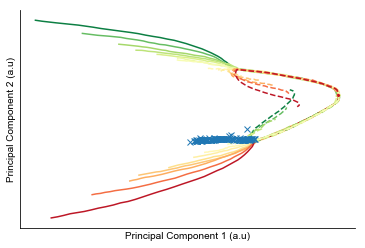

In [348]:
new_h = net.rnn.recurrence(input, hidden)
def myloss(new_h, hidden):
    return torch.sum((new_h - hidden) ** 2, axis=1)

area = 0 #0 1 2
idx_area = idx1
# idx_area = np.arange(100)

testloss = myloss(new_h[:, idx_area], hidden[:, idx_area])
testloss_np = testloss.detach().numpy()
idx_testloss = [idx for idx,l in enumerate(testloss_np) if l < 1e-3]
print(idx_testloss)

fixedpoints = hidden.detach().numpy()
fixedpoints = fixedpoints[idx_testloss]

f = dyn.plot_pcs_area(window=np.arange(0,185), is_x=True, partition_idx=area)


PCs = dyn.partition_pca[area]['PCs']
means = dyn.partition_pca[area]['means']

dims = dyn.dims
scores = np.dot(PCs[:, dims].T, (fixedpoints[:, idx_area] - means).T)


plt.plot(scores[0, :], scores[1, :], 'x')

# plt.axis('off')

# Beautification
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Principal Component 1 (a.u)')
plt.ylabel('Principal Component 2 (a.u)')
plt.xticks([])
plt.yticks([])

# plt.xlim(-16, 8)
# plt.ylim(-14,10)
# ax.spines['left'].set_position(('data', -15))
# ax.spines['bottom'].set_position(('data', -16))

plt.title('')
if trial == 2:
    save_string = 'PCs_area1_bot.pdf'
elif trial == 1:
    save_string = 'PCs_area1_top.pdf'

plt.savefig(savePathD + save_string, format='pdf', dpi=None, bbox_inches='tight')



In [356]:
dir_axis = np.load(basePath + 'sims/revision/exemplar_new/scratch_data/axes/' + 'ex_dir_axis_J.npy')
dir_axis = dir_axis.reshape(-1)
col_axis = np.load(basePath + 'sims/revision/exemplar_new/scratch_data/axes/' + 'ex_col_axis_J.npy')
col_axis = col_axis.reshape(-1)
ctx_axis = np.load(basePath + 'sims/revision/exemplar_new/scratch_data/axes/' + 'ex_ctx_axis_J.npy')
ctx_axis = ctx_axis.reshape(-1)

start loc is targets1


(-15, 15)

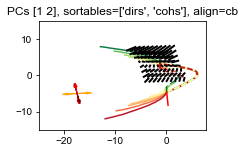

In [372]:
scale = 1

f = plt.figure(figsize=(3,2))

# f = plt.figure(figsize=(9,6))

dyn.partition_deltas(x_sample=10, y_sample=8, xmin=-10, xmax=10, ymin=-5, ymax=5)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=151, scale=scale*dyn.rnn.p['tau'])

ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

# plt.savefig(savePathD + 'PCs+check-on-dynamics-local.pdf')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
start loc is targets1


<Figure size 648x432 with 0 Axes>

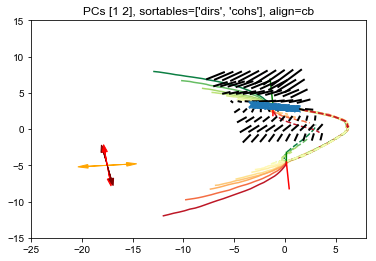

In [374]:
new_h = net.rnn.recurrence(input, hidden)
def myloss(new_h, hidden):
    return torch.sum((new_h - hidden) ** 2, axis=1)

area = 0 #0 1 2
idx_area = idx1
# idx_area = np.arange(100)

testloss = myloss(new_h, hidden)
testloss_np = testloss.detach().numpy()
idx_testloss = [idx for idx,l in enumerate(testloss_np) if l < 1e-2]
print(idx_testloss)

fixedpoints = hidden.detach().numpy()
fixedpoints = fixedpoints[idx_testloss]

f = plt.figure(figsize=(9,6))

f = dyn.plot_pcs_area(window=np.arange(0,180), is_x=True, partition_idx=area)

scale = 1
# f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
# f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
# f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=6, arrow_color='orange')
# f = dyn.plot_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=4, arrow_color='maroon')
# f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=4, arrow_color='red')
# f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='targets1', f=f, scale=6, arrow_color='orange')
# f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='targets1', f=f, scale=4, arrow_color='maroon')
# f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='targets1', f=f, scale=4, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=151, scale=scale*dyn.rnn.p['tau'])
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')

PCs = dyn.partition_pca[area]['x_PCs']
means = dyn.partition_pca[area]['x_means']


dims = dyn.dims
scores = np.dot(PCs[:, dims].T, (fixedpoints[:, idx_area] - means).T)


plt.plot(scores[0, :], scores[1, :], 'x')

# plt.axis('off')

# Beautification
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.xlabel('Principal Component 1 (a.u)')
# plt.ylabel('Principal Component 2 (a.u)')
# plt.xticks([])
# plt.yticks([])

# plt.title('')
# if left_right == -1:
#     save_string = 'PCs_area1_bot.pdf'
# elif left_right == 1:
#     save_string = 'PCs_area1_top.pdf'

plt.savefig(savePathD + save_string, format='pdf', dpi=None, bbox_inches='tight')
ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

plt.savefig(savePathD + 'PCs+check-on-dynamics-local.pdf')